<a href="https://colab.research.google.com/github/mollah2022/Neural-Network/blob/main/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# === Step 1: Load dataset ===
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/creditcard.csv")

# === Step 2: Separate features and label ===
X = df.drop('Class', axis=1)
y = df['Class']

In [ ]:
# === Step 3: SMOTE for balancing ===
smote = SMOTE(random_state=42)
X_bal, y_bal = smote.fit_resample(X, y)

In [ ]:
# === Step 4: Train-Test Split ===
X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size=0.2, random_state=42)

In [ ]:

# === Step 5: Scale data ===
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# === Step 6: Build Neural Network Models ===

# === Model 1: Simple Neural Network ===
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history1 = model1.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_data=(X_test_scaled, y_test))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 60s 4ms/step - accuracy: 0.9686 - loss: 0.0853 - val_accuracy: 0.9893 - val_loss: 0.0302
Epoch 2/20
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 32s 2ms/step - accuracy: 0.9911 - loss: 0.0265 - val_accuracy: 0.9920 - val_loss: 0.0218
Epoch 3/20
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 37s 3ms/step - accuracy: 0.9942 - loss: 0.0188 - val_accuracy: 0.9956 - val_loss: 0.0154
Epoch 4/20
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 32s 2ms/step - accuracy: 0.9959 - loss: 0.0145 - val_accuracy: 0.9964 - val_loss: 0.0123
Epoch 5/20
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 37s 3ms/step - accuracy: 0.9970 - loss: 0.0115 - val_accuracy: 0.9975 - val_loss: 0.0107
Epoch 6/20
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 32s 2ms/step - accuracy: 0.9975 - loss: 0.0098 - val_accuracy: 0.9976 - val_loss: 0.0093
Epoch 7/20
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 33s 2ms/step - accuracy: 0.9979 - loss: 0.0085 - val_accuracy: 0.9976 - val_loss: 0.0085
Epoch 8/20
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 46s 3ms/step - accuracy: 

In [ ]:
# === Evaluation ===
y_pred1 = (model1.predict(X_test_scaled) > 0.5).astype("int32")
print("\nModel 1 Report:")
print(classification_report(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))

3554/3554 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step

Model 1 Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

[[56665    85]
 [   15 56961]]


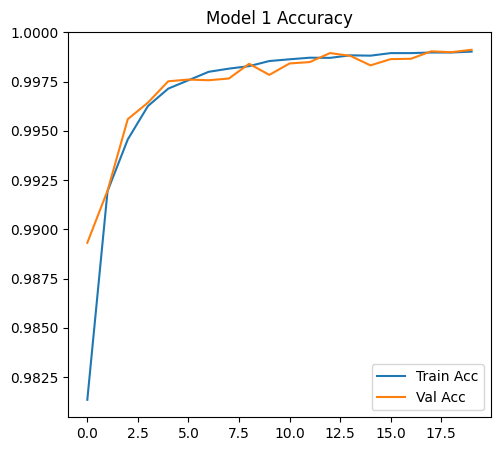

In [ ]:
# === Plotting Accuracy & Loss ===
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history1.history['accuracy'], label='Train Acc')
plt.plot(history1.history['val_accuracy'], label='Val Acc')
plt.title('Model 1 Accuracy')
plt.legend()

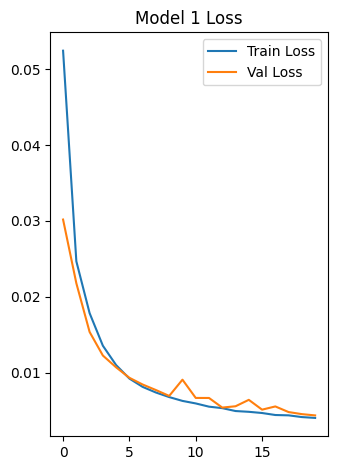

In [ ]:
plt.subplot(1,2,2)
plt.plot(history1.history['loss'], label='Train Loss')
plt.plot(history1.history['val_loss'], label='Val Loss')
plt.title('Model 1 Loss')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# === XAI (Explainable AI) using SHAP ===
!pip install shap -q
import shap

In [ ]:
# SHAP explainer তৈরি (model1 ব্যবহার করবো)
explainer = shap.KernelExplainer(model1.predict, X_train_scaled[:100])  # সময় বাঁচাতে 100 sample
shap_values = explainer.shap_values(X_test_scaled[:100])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  0%|          | 0/100 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
6588/6588 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
6588/6588 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
6588/6588 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
6588/6588 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
6588/6588 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
6588/6588 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
6588/6588 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
6588/6588 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
6588/6588 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
6588/6588 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
6588/6588 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
6588/6588 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


  0%|          | 0/100 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
3294/3294 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
3294/3294 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
3294/3294 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
3294/3294 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
3294/3294 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
3294/3294 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
3294/3294 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
3294/3294 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
3294/3294 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
3294/3294 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
3294/3294 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
3294/3294 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

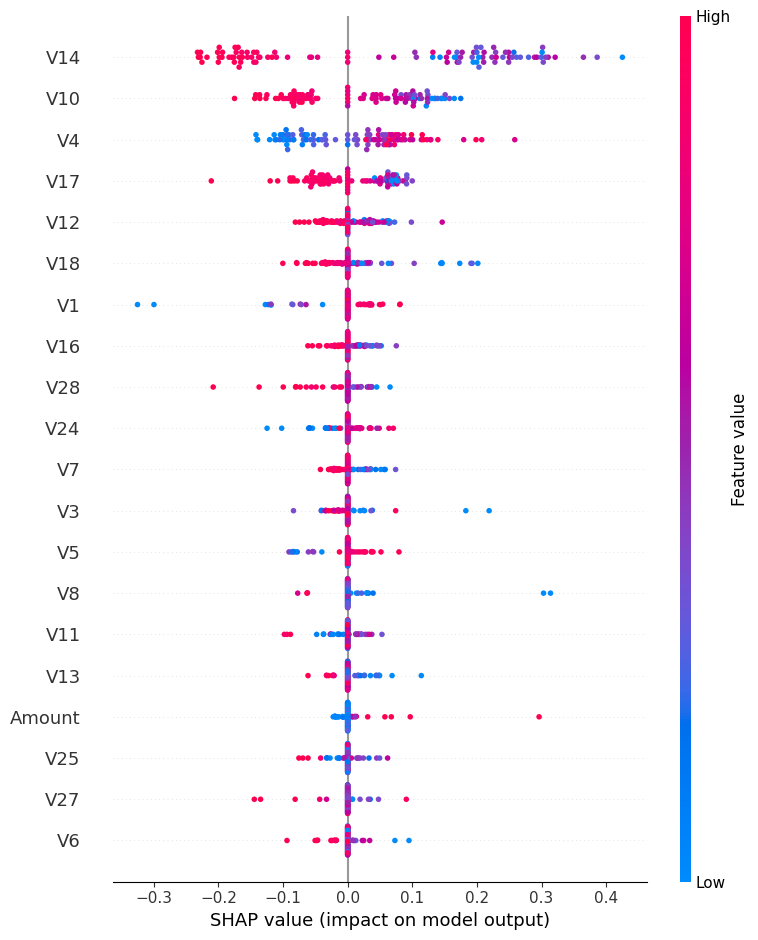

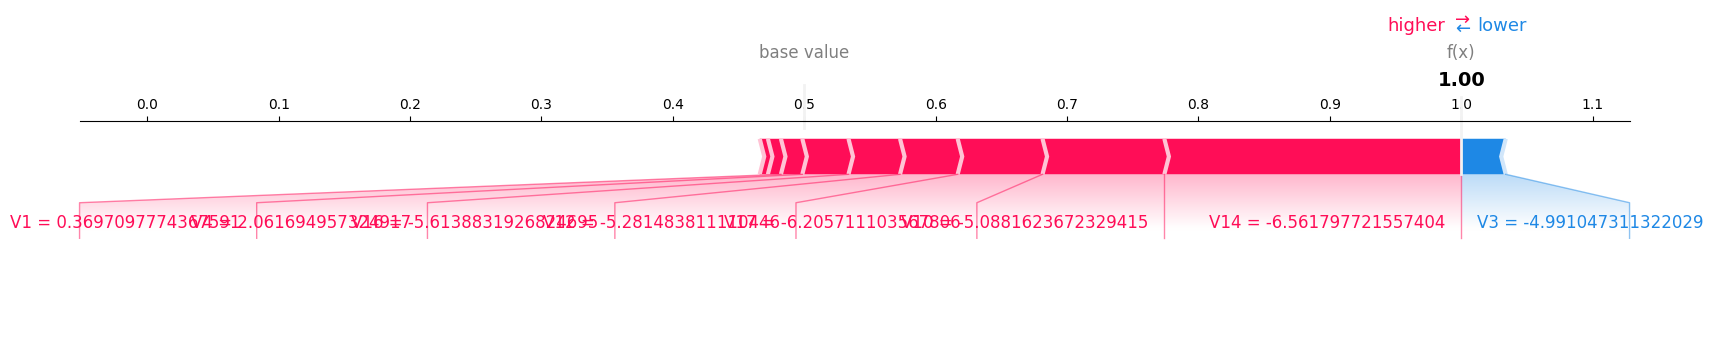

In [ ]:
# === XAI (Explainable AI with SHAP) ===
!pip install shap -q
import shap
import numpy as np

# ছোট sample নেওয়া হয়েছে (সময় বাঁচাতে)
sample_X = X_test_scaled[:100]
sample_original = X_test.iloc[:100]

# 1️⃣ Wrapper function বানাই যাতে output shape ঠিক থাকে
def model_predict(x):
    return model1.predict(x).flatten()

# 2️⃣ Explainer তৈরি
explainer = shap.KernelExplainer(model_predict, X_train_scaled[:50])  # background data ছোট রাখা হয়েছে

# 3️⃣ SHAP values বের করা
shap_values = explainer.shap_values(sample_X)

# 4️⃣ Summary Plot (Feature Importance)
shap.summary_plot(shap_values, sample_original, feature_names=X.columns)

# 5️⃣ Force Plot (একটা ইনস্ট্যান্স ব্যাখ্যা)
index = 0  # তুমি চাইলে অন্য index দিতেও পারো
shap.force_plot(
    explainer.expected_value,
    shap_values[index],
    sample_original.iloc[index, :],
    matplotlib=True
)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


  0%|          | 0/100 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
6588/6588 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
6588/6588 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
6588/6588 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
6588/6588 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
6588/6588 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
6588/6588 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
6588/6588 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
6588/6588 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
6588/6588 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
6588/6588 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
6588/6588 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
6588/6588 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

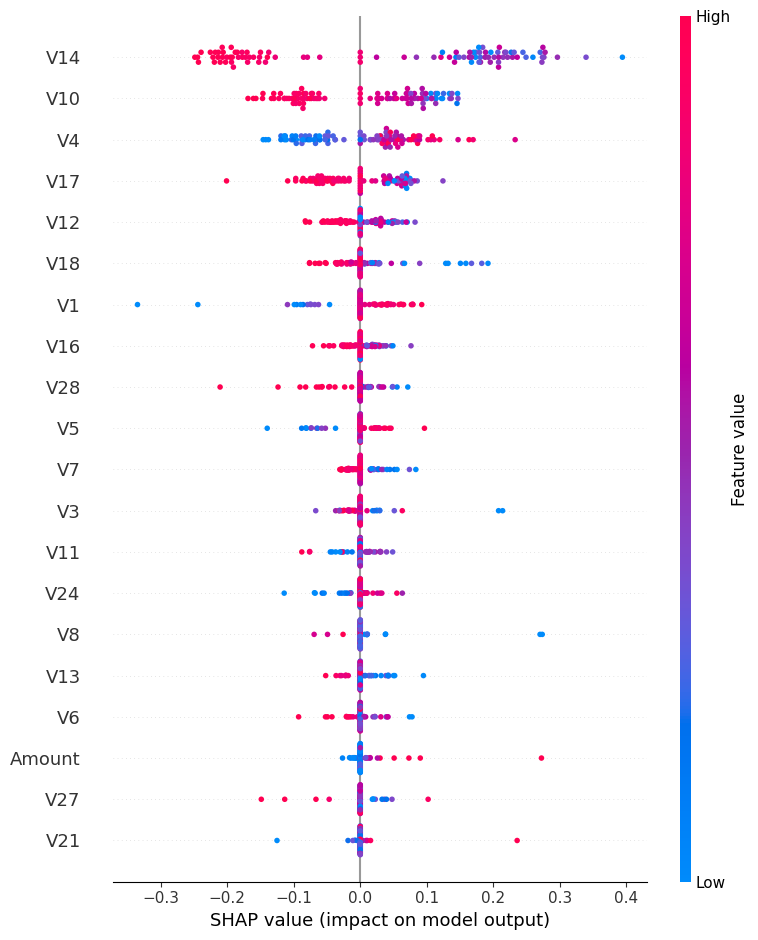

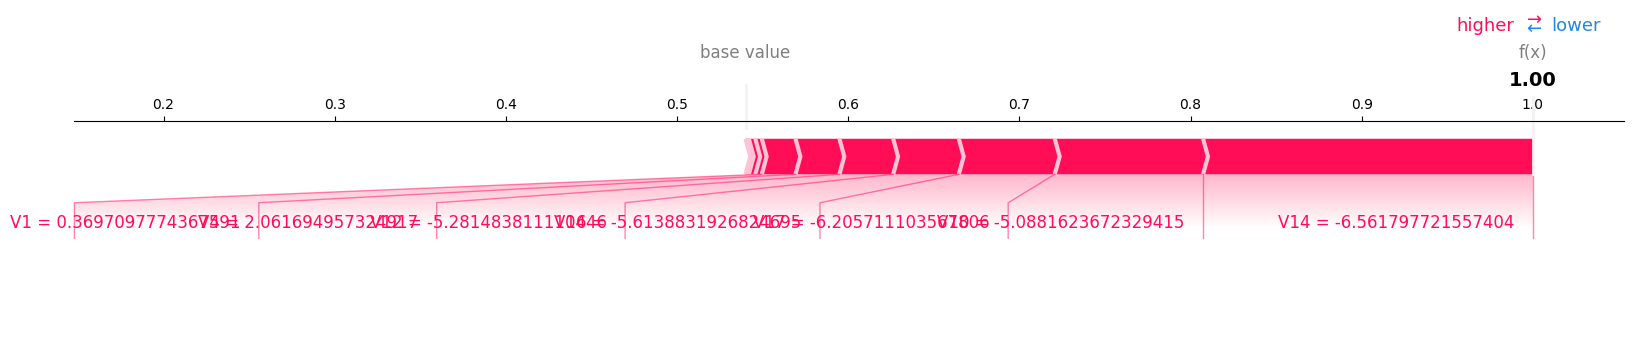

In [ ]:
# === XAI (Feature Importance using SHAP) ===
!pip install shap -q
import shap
import numpy as np

# Helper function (output shape ঠিক রাখার জন্য)
def model_predict(x):
    return model1.predict(x).flatten()

# Explainer (আগের background data reuse করা হচ্ছে)
explainer = shap.KernelExplainer(model_predict, X_train_scaled[:100])

# SHAP values বের করা
shap_values = explainer.shap_values(X_test_scaled[:100])

# Summary Plot (Feature Importance)
shap.summary_plot(shap_values, X_test.iloc[:100], feature_names=X.columns)

# Individual Explanation (১টা sample-এর জন্য)
shap.force_plot(
    explainer.expected_value,
    shap_values[0],
    X_test.iloc[0],
    matplotlib=True
)


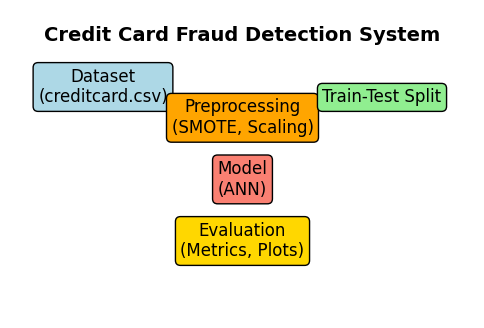

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6,4))
ax.axis('off')
ax.annotate('Credit Card Fraud Detection System', xy=(0.5,0.9), ha='center', fontsize=14, weight='bold')
ax.annotate('Dataset\n(creditcard.csv)', xy=(0.2,0.7), ha='center', bbox=dict(boxstyle="round,pad=0.3", fc="lightblue"), fontsize=12)
ax.annotate('Preprocessing\n(SMOTE, Scaling)', xy=(0.5,0.6), ha='center', bbox=dict(boxstyle="round,pad=0.3", fc="orange"), fontsize=12)
ax.annotate('Train-Test Split', xy=(0.8,0.7), ha='center', bbox=dict(boxstyle="round,pad=0.3", fc="lightgreen"), fontsize=12)
ax.annotate('Model\n(ANN)', xy=(0.5,0.4), ha='center', bbox=dict(boxstyle="round,pad=0.3", fc="salmon"), fontsize=12)
ax.annotate('Evaluation\n(Metrics, Plots)', xy=(0.5,0.2), ha='center', bbox=dict(boxstyle="round,pad=0.3", fc="gold"), fontsize=12)

plt.show()


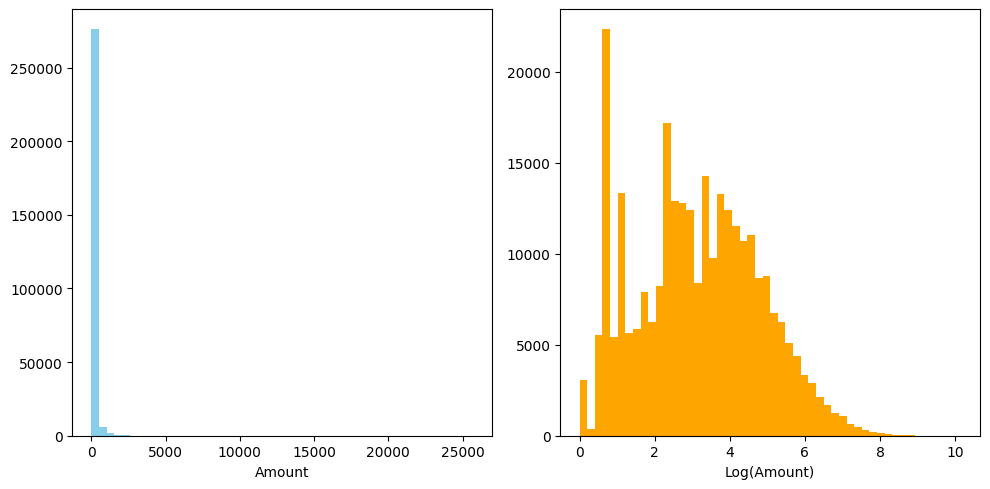

In [ ]:
import numpy as np

# Before log transformation
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(df['Amount'], bins=50, color='skyblue')
plt.xlabel('Amount')

# After log transformation
plt.subplot(1,2,2)
plt.hist(np.log1p(df['Amount']), bins=50, color='orange')
plt.xlabel('Log(Amount)')
plt.tight_layout()
plt.show()


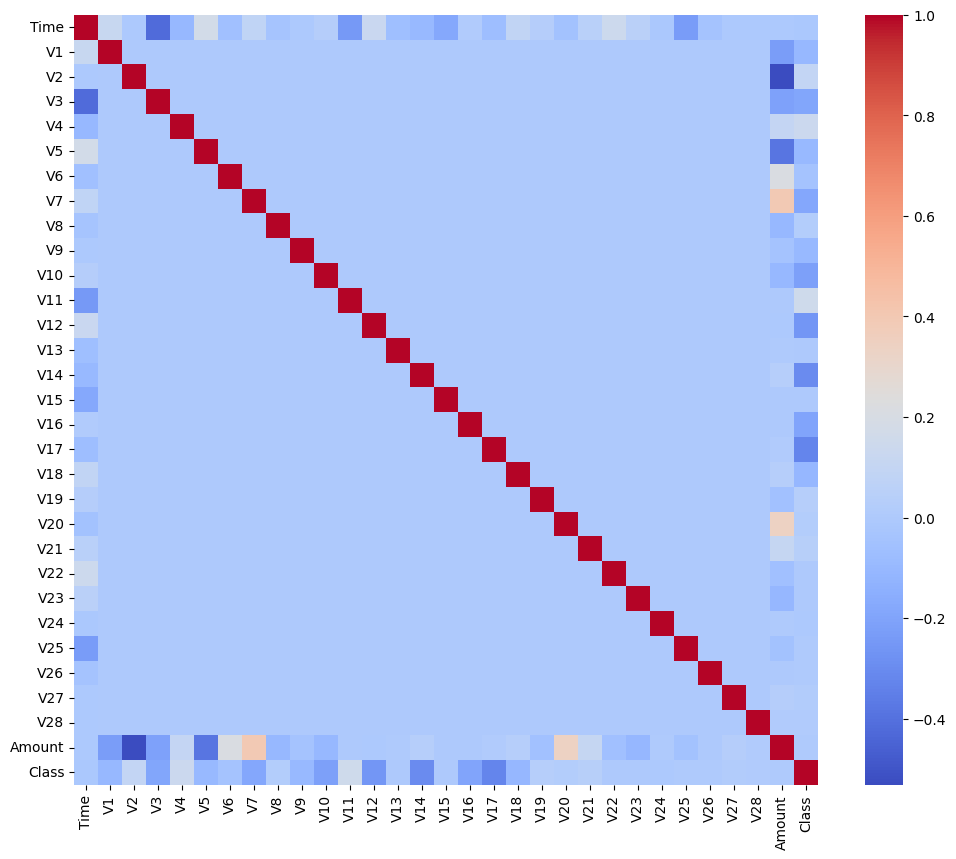

In [ ]:
import seaborn as sns

corr = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.show()


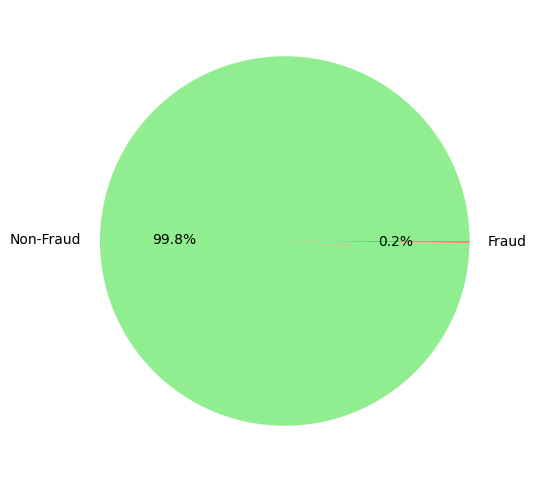

In [ ]:
class_counts = df['Class'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(class_counts, labels=['Non-Fraud', 'Fraud'], autopct='%1.1f%%', colors=['lightgreen','salmon'])
plt.show()


In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model1, show_shapes=True, show_layer_names=True)
# Or, textual summary
print(model1.summary())


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,077 (12.02 KB)

 Trainable params: 1,025 (4.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,052 (8.02 KB)

None


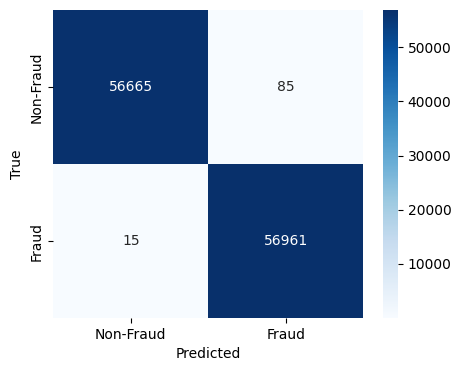

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred1)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


3554/3554 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step


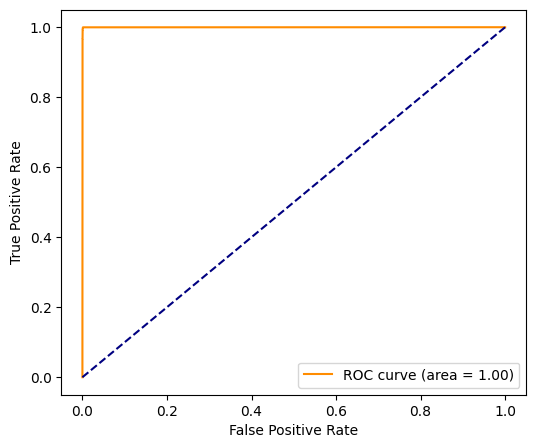

In [ ]:
from sklearn.metrics import roc_curve, auc

y_probs = model1.predict(X_test_scaled)
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='darkorange', label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0,1],[0,1],'--',color='navy')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


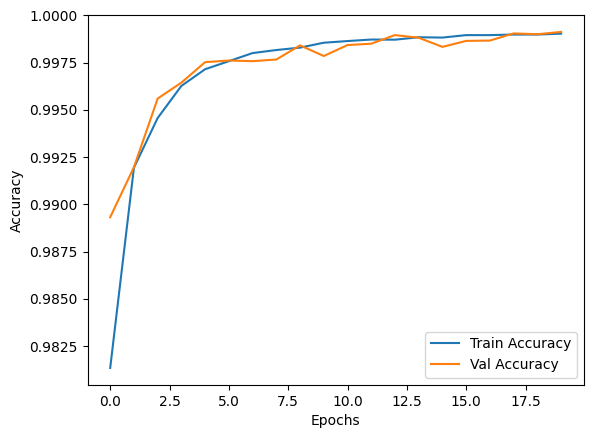

In [ ]:
plt.figure()
plt.plot(history1.history['accuracy'], label='Train Accuracy')
plt.plot(history1.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


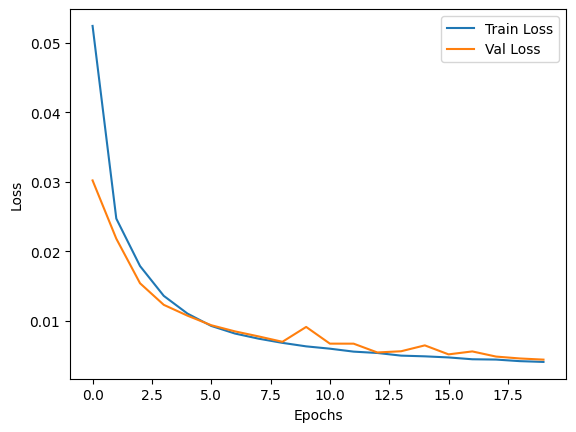

In [ ]:
plt.figure()
plt.plot(history1.history['loss'], label='Train Loss')
plt.plot(history1.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import f1_score

data = {
    'Model': ['Existing', 'Proposed'],
    'Accuracy': [0.90, float(history1.history['val_accuracy'][-1])],
    'F1': [0.85, f1_score(y_test, y_pred1)]
}
performance_df = pd.DataFrame(data)
print(performance_df)


      Model  Accuracy        F1
0  Existing  0.900000  0.850000
1  Proposed  0.999121  0.999123


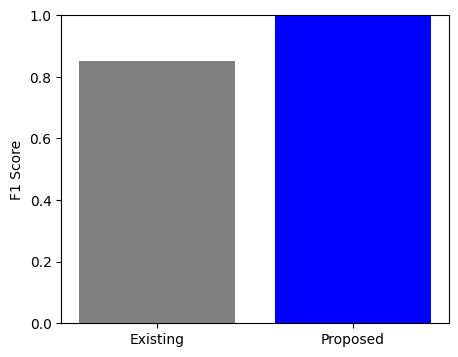

In [ ]:
plt.figure(figsize=(5,4))
plt.bar(['Existing', 'Proposed'], [0.85, f1_score(y_test, y_pred1)], color=['grey','blue'])
plt.ylabel('F1 Score')
plt.ylim(0,1)
plt.show()


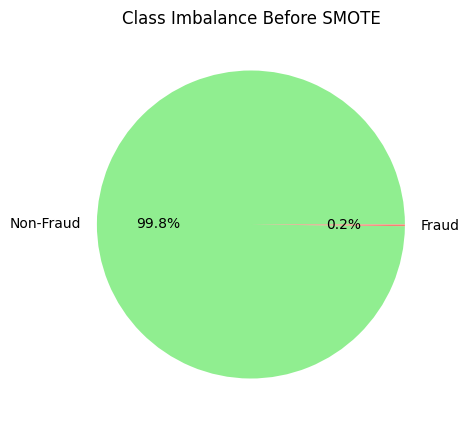

In [ ]:
plt.figure(figsize=(5,5))
plt.pie(df['Class'].value_counts(), labels=['Non-Fraud', 'Fraud'], autopct='%1.1f%%', colors=['lightgreen', 'salmon'])
plt.title('Class Imbalance Before SMOTE')
plt.show()


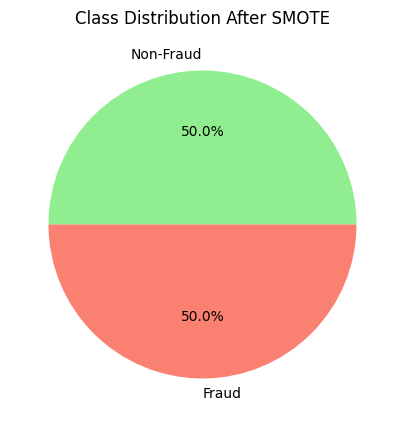

In [ ]:
plt.figure(figsize=(5,5))
plt.pie(pd.Series(y_bal).value_counts(), labels=['Non-Fraud', 'Fraud'], autopct='%1.1f%%', colors=['lightgreen', 'salmon'])
plt.title('Class Distribution After SMOTE')
plt.show()


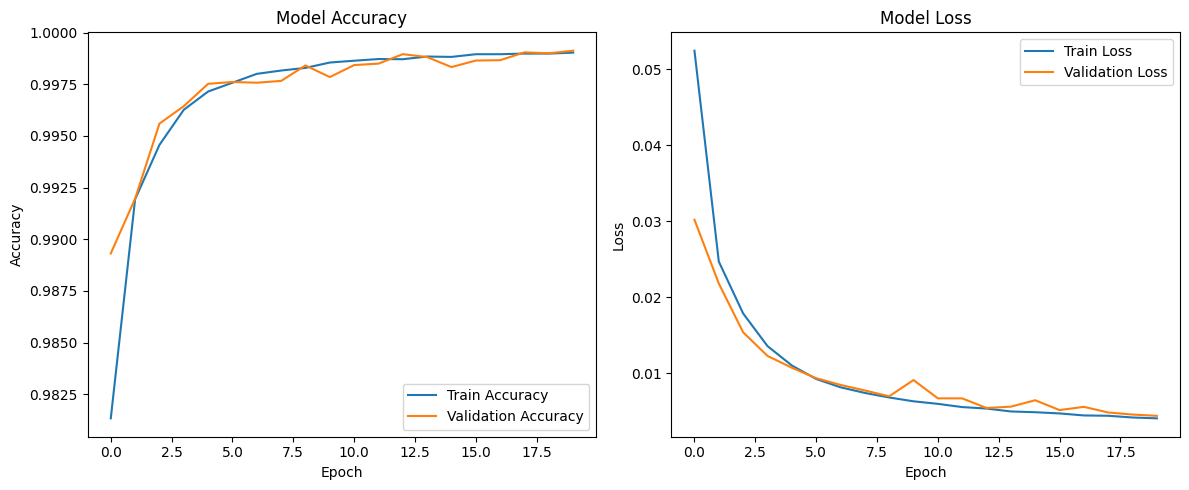

In [ ]:
plt.figure(figsize=(12,5))

# Accuracy plot
plt.subplot(1,2,1)
plt.plot(history1.history['accuracy'], label='Train Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1,2,2)
plt.plot(history1.history['loss'], label='Train Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred1))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



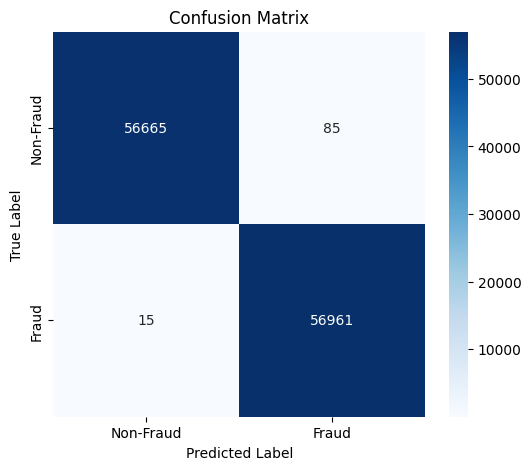

In [ ]:
cm = confusion_matrix(y_test, y_pred1)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [ ]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred1)
print("F1 Score:", f1)


F1 Score: 0.9991229762677378


3554/3554 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step


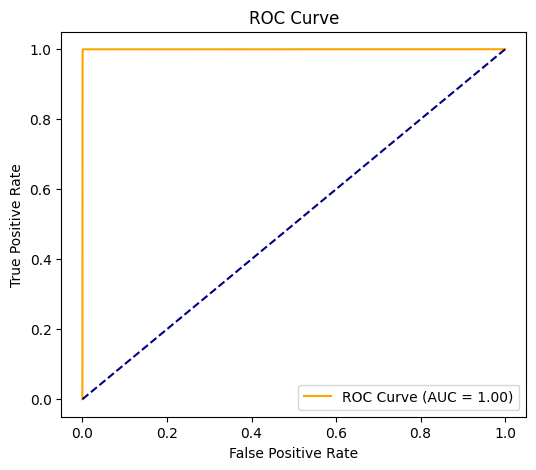

In [ ]:
from sklearn.metrics import roc_curve, auc

y_probs = model1.predict(X_test_scaled)
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color="orange")
plt.plot([0,1],[0,1],'--',color='navy')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [ ]:
# Final accuracy of the model on test data
final_accuracy = model1.evaluate(X_test_scaled, y_test, verbose=0)[1]
print("Final Test Accuracy:", final_accuracy)


Final Test Accuracy: 0.9991207122802734


In [ ]:
from sklearn.metrics import classification_report, f1_score, recall_score, precision_score

# Model accuracy
final_accuracy = model1.evaluate(X_test_scaled, y_test, verbose=0)[1]
print("Final Test Accuracy:", final_accuracy)

# F1 score
f1 = f1_score(y_test, y_pred1)
print("F1 Score:", f1)

# Recall
recall = recall_score(y_test, y_pred1)
print("Recall:", recall)

# Precision
precision = precision_score(y_test, y_pred1)
print("Precision:", precision)

# Classification report (all metrics)
print("Classification Report:\n", classification_report(y_test, y_pred1))


Final Test Accuracy: 0.9991207122802734
F1 Score: 0.9991229762677378
Recall: 0.9997367312552654
Precision: 0.9985099744066193
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

